Inventory Overview & Filtering Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
inventory = pd.read_excel('/retail_store_inventory_data.xlsx')

In [3]:
inventory.head()
inventory.tail()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing,Seasonality,Weather Condition
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,0,72.45,Winter,Snowy
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,0,83.78,Autumn,Cloudy
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,0,10.91,Winter,Rainy
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,0,55.80,Spring,Rainy
73099,2024-01-01,S005,P0020,Groceries,East,117,6,165,2.33,78.39,20,1,79.52,Spring,Rainy


In [4]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Store ID            73100 non-null  object        
 2   Product ID          73100 non-null  object        
 3   Category            73100 non-null  object        
 4   Region              73100 non-null  object        
 5   Inventory Level     73100 non-null  int64         
 6   Units Sold          73100 non-null  int64         
 7   Units Ordered       73100 non-null  int64         
 8   Demand Forecast     73100 non-null  float64       
 9   Price               73100 non-null  float64       
 10  Discount            73100 non-null  int64         
 11  Holiday/Promotion   73100 non-null  int64         
 12  Competitor Pricing  73100 non-null  float64       
 13  Seasonality         73100 non-null  object    

In [5]:
inventory.loc[inventory['Demand Forecast'] > 250, ['Store ID', 'Product ID', 'Demand Forecast', 'Units Sold']]

,Store ID,Product ID,Demand Forecast,Units Sold
7,S001,P0008,329.73,312
14,S001,P0015,363.46,369
15,S001,P0016,255.74,255
16,S001,P0017,255.37,246
18,S001,P0019,267.38,257
...,...,...,...,...
73087,S005,P0008,287.34,292
73091,S005,P0012,317.46,324
73092,S005,P0013,277.27,276
73094,S005,P0015,336.64,323


136.46487004103966


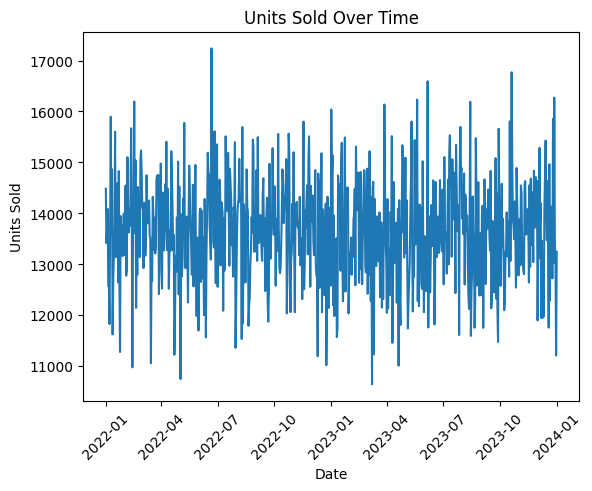

In [9]:
if 'Date' in inventory.columns and 'Units Sold' in inventory.columns:
    inventory_date = inventory.groupby('Date')['Units Sold'].sum().reset_index()
    plt.figure()
    sns.lineplot(data=inventory_date, x='Date', y='Units Sold')
    plt.title('Units Sold Over Time')
    plt.xticks(rotation=45)
    print(inventory['Units Sold'].mean())
    plt.show()

/tmp/ipython-input-11-1437485498.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


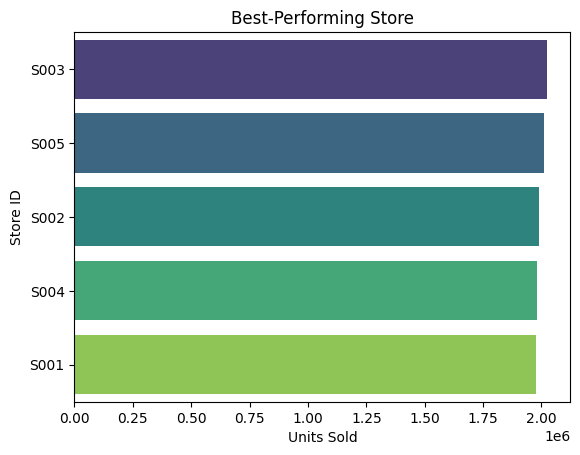

In [11]:
if 'Store ID' in inventory.columns and 'Units Sold' in inventory.columns:
    top_products = inventory.groupby('Store ID')['Units Sold'].sum().sort_values(ascending=False).head(10)
    plt.figure()
    sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
    plt.title('Best-Performing Store')
    plt.xlabel('Units Sold')
    plt.ylabel('Store ID')
    plt.show()

/tmp/ipython-input-10-1781674533.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


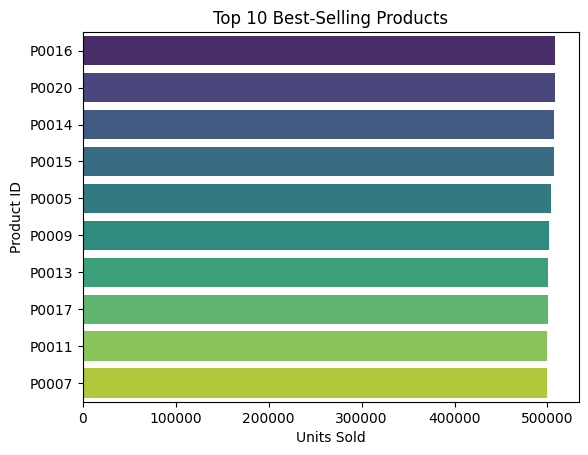

In [10]:
if 'Product ID' in inventory.columns and 'Units Sold' in inventory.columns:
    top_products = inventory.groupby('Product ID')['Units Sold'].sum().sort_values(ascending=False).head(10)
    plt.figure()
    sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
    plt.title('Top 10 Best-Selling Products')
    plt.xlabel('Units Sold')
    plt.ylabel('Product ID')
    plt.show()

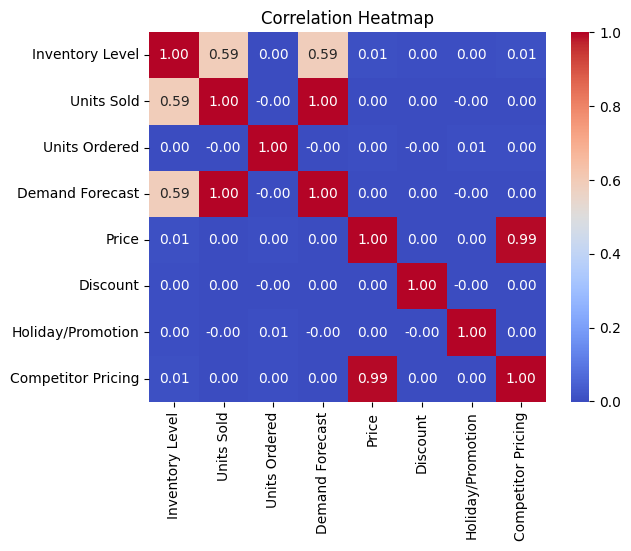

In [12]:
plt.figure()
numeric_df = inventory.select_dtypes(include=np.number)
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

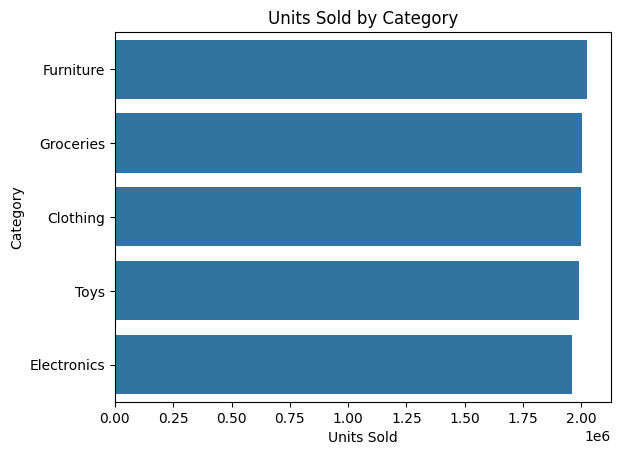

In [14]:
if 'Category' in inventory.columns and 'Units Sold' in inventory.columns:
    category_sales = inventory.groupby('Category')['Units Sold'].sum().sort_values(ascending=False)
    plt.figure()
    sns.barplot(x=category_sales.values, y=category_sales.index)
    plt.title('Units Sold by Category')
    plt.xlabel('Units Sold')
    plt.ylabel('Category')
    plt.show()

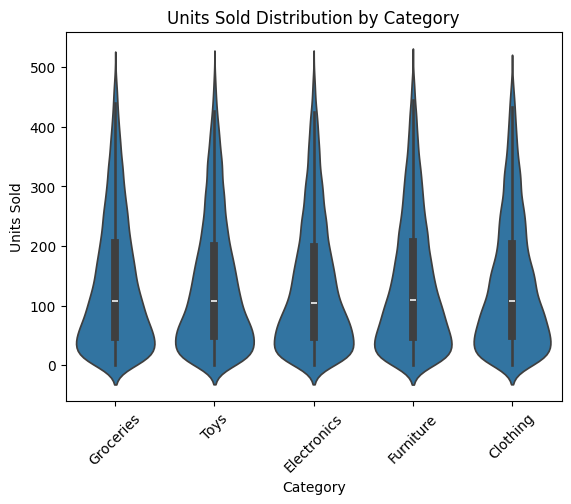

In [18]:
if 'Units Sold' in inventory.columns and 'Category' in inventory.columns:
    plt.figure()
    sns.violinplot(data=inventory, x='Category', y='Units Sold')
    plt.title('Units Sold Distribution by Category')
    plt.xticks(rotation=45)
    plt.show()


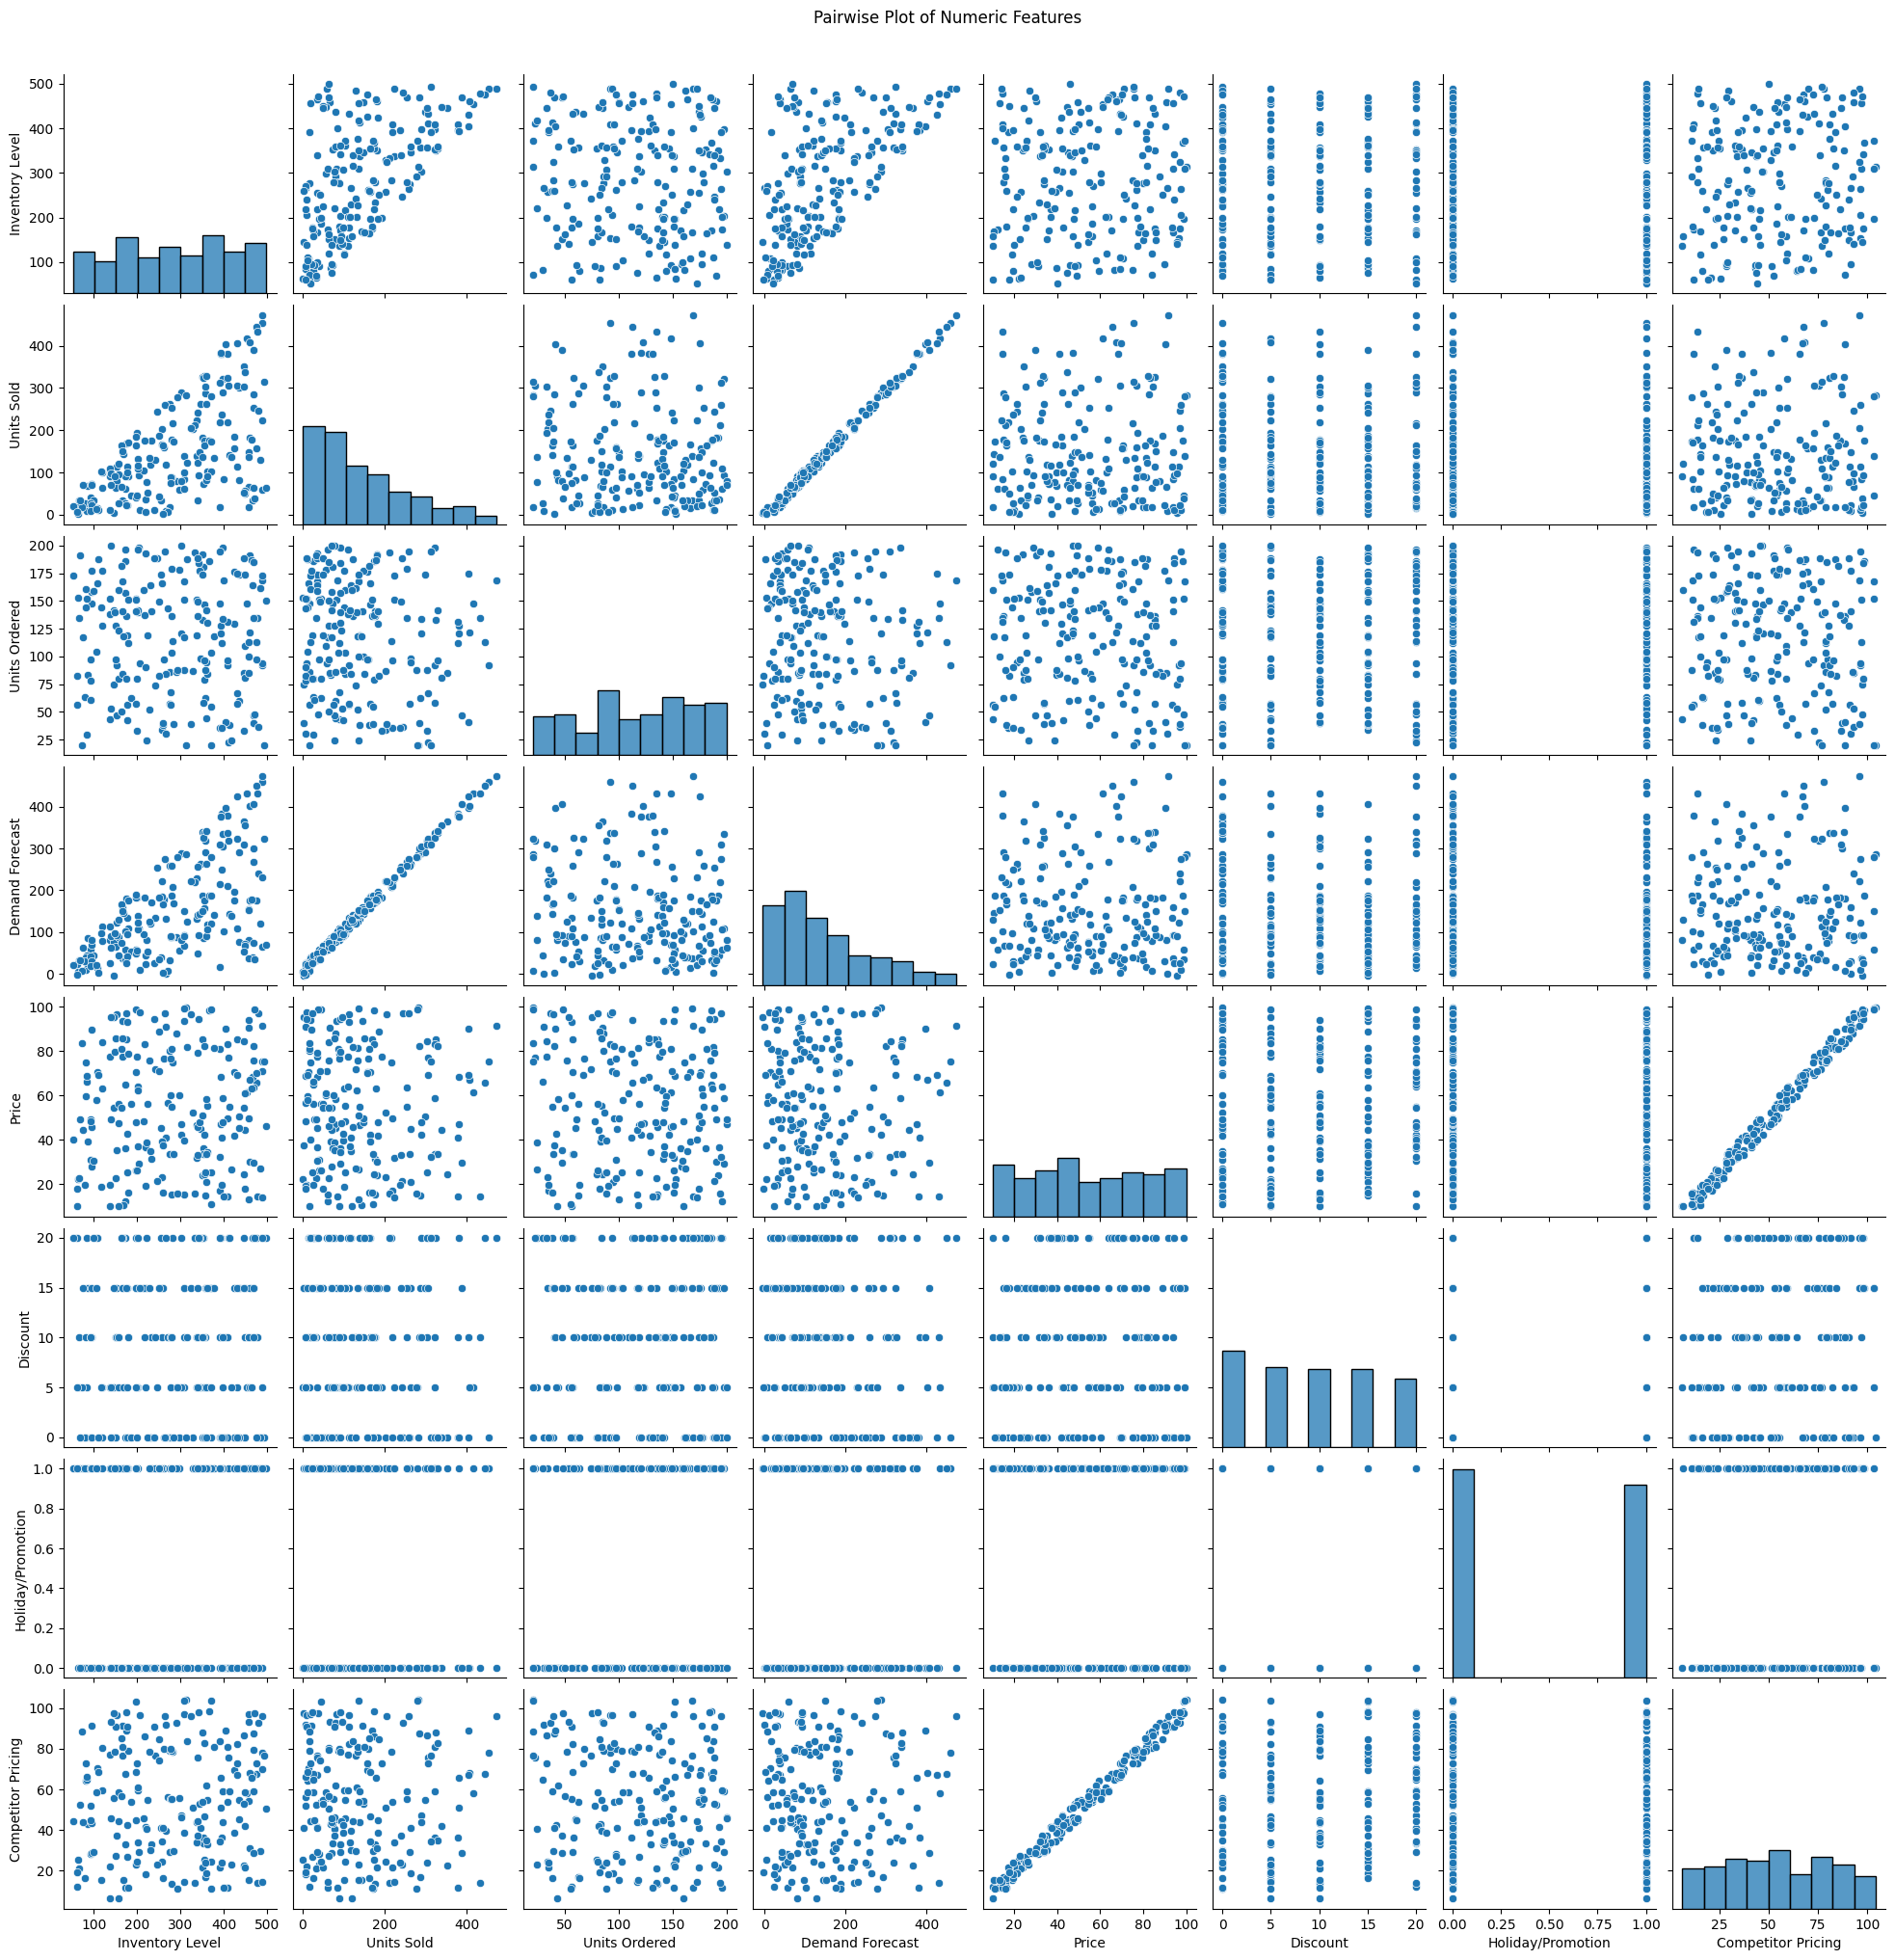

In [19]:
numeric_cols = inventory.select_dtypes(include='number').columns
if len(numeric_cols) >= 2:
    sns.pairplot(inventory[numeric_cols].sample(200))  # sample to avoid overload
    plt.suptitle("Pairwise Plot of Numeric Features", y=1.02)
    plt.show()

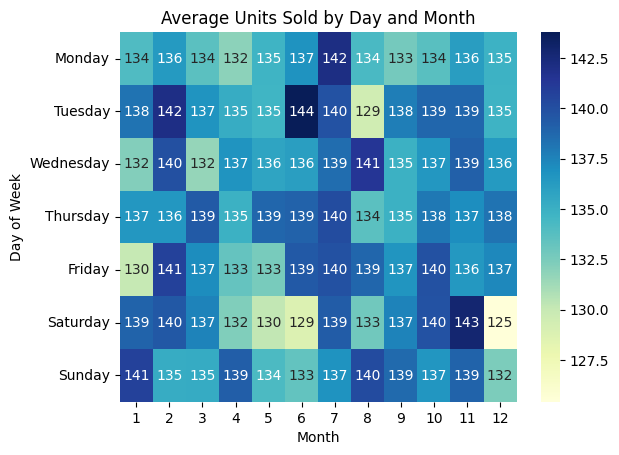

In [20]:
if 'Date' in inventory.columns and 'Units Sold' in inventory.columns:
    inventory['Month'] = inventory['Date'].dt.month
    inventory['DayOfWeek'] = inventory['Date'].dt.day_name()
    pivot = inventory.pivot_table(index='DayOfWeek', columns='Month', values='Units Sold', aggfunc='mean')
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    pivot = pivot.reindex(day_order)
    sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
    plt.title("Average Units Sold by Day and Month")
    plt.xlabel("Month")
    plt.ylabel("Day of Week")
    plt.show()

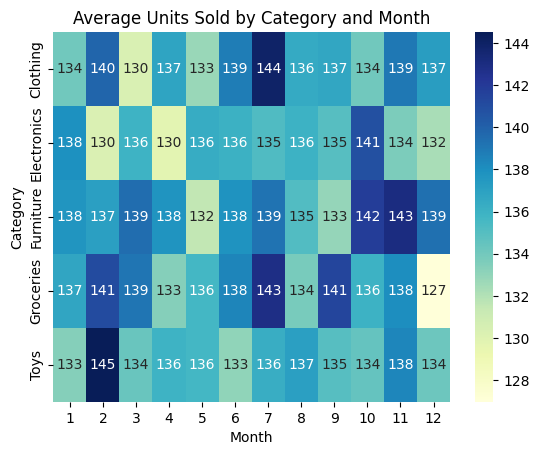

In [21]:
# Heatmap: Avg Units Sold by Category and Month
if {'Category', 'Date', 'Units Sold'}.issubset(inventory.columns):
    inventory['Month'] = inventory['Date'].dt.month
    pivot_cat = inventory.pivot_table(index='Category', columns='Month', values='Units Sold', aggfunc='mean')
    sns.heatmap(pivot_cat, cmap='YlGnBu', annot=True, fmt='.0f')
    plt.title("Average Units Sold by Category and Month")
    plt.xlabel("Month")
    plt.ylabel("Category")
    plt.show()


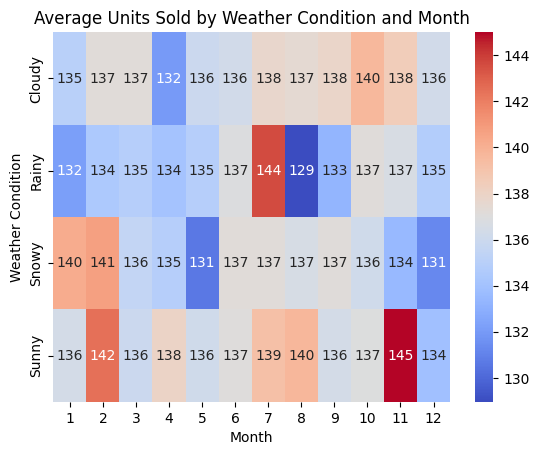

In [22]:
# Heatmap: Avg Units Sold by Weather Condition and Month
if {'Weather Condition', 'Date', 'Units Sold'}.issubset(inventory.columns):
    inventory['Month'] = inventory['Date'].dt.month
    pivot_weather = inventory.pivot_table(index='Weather Condition', columns='Month', values='Units Sold', aggfunc='mean')
    sns.heatmap(pivot_weather, cmap='coolwarm', annot=True, fmt='.0f')
    plt.title("Average Units Sold by Weather Condition and Month")
    plt.xlabel("Month")
    plt.ylabel("Weather Condition")
    plt.show()
